In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

(485, 377, 3)


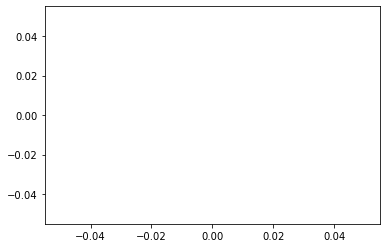

In [2]:
classifier_eyes=cv2.CascadeClassifier('/Users/parthsharma/Desktop/Data Science CB/Train/third-party/frontalEyes35x16.xml')
classifier_nose=cv2.CascadeClassifier('/Users/parthsharma/Desktop/Data Science CB/Train/third-party/Nose18x15.xml')

img_before=cv2.imread('/Users/parthsharma/Desktop/Data Science CB/Test_SnapchatFilter/Before.png')
gray=cv2.cvtColor(img_before,cv2.COLOR_BGR2GRAY)
plt.plot()

print(img_before.shape)





(320, 640, 4)


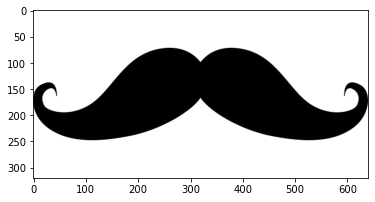

In [3]:
img_mustache=cv2.imread('/Users/parthsharma/Desktop/Data Science CB/Train/mustache.png',-1)
#img_mustache=cv2.cvtColor(img_mustache,cv2.COLOR_BGR2RGB)
plt.imshow(img_mustache)
plt.plot()
print(img_mustache.shape)





221


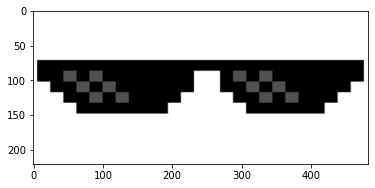

In [4]:
img_glasses=cv2.imread('/Users/parthsharma/Desktop/Data Science CB/Train/glasses.png',-1)

plt.imshow(img_glasses)
plt.plot()

print(img_glasses.shape[0])



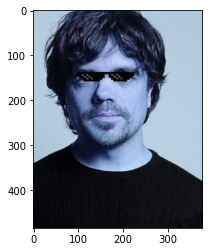

In [5]:
eyes=classifier_eyes.detectMultiScale(gray,1.3,5)

(x,y,w,h)=eyes[0]

glass=cv2.resize(img_glasses,(w,h))

#for (x,y,w,h) in eyes:
    #cv2.rectangle(img_before,(x,y),(x+w,y+h),(255,0,0),2)
    
    
    
for i in range(glass.shape[0]):
    for j in range(glass.shape[1]):
        if glass[i,j,3]>0:
            img_before[y+i,x+j,:]=glass[i,j,:-1]
        
        
plt.imshow(img_before)
plt.show()
    
#cv2.imshow("frame",img_before)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [6]:
nose = classifier_nose.detectMultiScale(img_before,1.3,5)
(x,y,w,h) = nose[0]
for (x,y,w,h) in nose:        
    if h > 0 and w > 0:
        w = int(1.5*w)
        y+=40
        x-=20


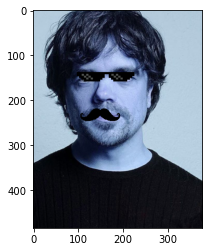

In [7]:
mustache=cv2.resize(img_mustache,(w,h))
img_new=img_before
for i in range(mustache.shape[0]):
    for j in range(mustache.shape[1]):
        if (mustache[i,j,3])>0:
            img_new[y+i,x+j,:]=mustache[i,j,:-1]
plt.imshow(img_new)  
plt.show()

In [8]:
img=np.array(img_new)
img_f=img.flatten()

In [9]:
print(img_f)

[180 202 219 ...  15  15  22]


In [10]:
img_to_csv=img_f.reshape(-1,3)

In [11]:
df=pd.DataFrame(img_to_csv)
df.reset_index(drop=True,inplace=True)
df.columns=["channel 1","channel 2","channel 3"]

display(df)

,channel 1,channel 2,channel 3
0,180,202,219
1,181,203,220
2,180,202,219
3,181,203,220
4,180,202,219
...,...,...,...
182840,17,17,23
182841,14,14,20
182842,13,13,19
182843,15,15,21


In [12]:
df.to_csv('submission_Snapchat.csv',index=False)
df.head()

,channel 1,channel 2,channel 3
0,180,202,219
1,181,203,220
2,180,202,219
3,181,203,220
4,180,202,219


In [13]:
mustache[1][1]

array([0, 0, 0, 0], dtype=uint8)